## MLC HW 4

### Question 1 (40 points)

In this question, you will model traffic counts in Pittsburgh using Gaussian process (GP) regression.  The included dataset, "PittsburghTrafficCounts.csv", represents the average daily traffic counts computed by traffic sensors at over 1,100 locations in Allegheny County, PA.  The data was collected from years 2012-2014 and compiled by Carnegie Mellon University’s Traffic21 Institute; we have the longitude, latitude, and average daily count for each sensor.  

Given this dataset, your goal is to learn a model of traffic count as a function of spatial location.  To do so, fit a Gaussian Process regression model to the observed data.  While you can decide on the precise kernel specification, you should try to achieve a good model fit, as quantified by a log marginal likelihood value greater than (i.e., less negative than) -1400.  Here are some hints for getting a good model fit:

* We recommend that you take the logarithm of the traffic counts, and then subtract the mean of this vector, before fitting the model.

* Since the data is noisy, don't forget to include a noise term (WhiteKernel) in your model.

* When fitting a GP with RBF kernel on multidimensional data, you can learn a separate length scale for each dimension, e.g., length_scale=(length_scale_x, length_scale_y). 

Your Python code should provide the following five outputs:

1) The kernel after parameter optimization and fitting to the observed data. (10 pts)

2) The log marginal likelihood of the training data. (5 pts)

3) Show a 2-D plot of the model's predictions over a mesh grid of longitude/latitude (with color corresponding to the model's predictions) and overlay a 2-D scatter plot of sensor locations (with color corresponding to the observed values). (10 pts)

4) What percentage of sensors have average traffic counts more than two standard deviations higher or lower than the model predicts given their spatial location? (5 pts)

5) Show a 2-D scatter plot of the sensor locations, with three colors corresponding to observed values a) more than two standard deviations higher than predicted, b) more then two standard deviations lower than predicted, and c) within two standard deviations of the predicted values. (10 pts)


In [1]:
import pandas as pd
import numpy as np
Data1=pd.read_csv("PittsburghTrafficCounts.csv")
Data1.head()

,Longitude,Latitude,AvgDailyTrafficCount
0,-80.278366,40.468606,84.0
1,-80.162117,40.384598,95.0
2,-80.221205,40.366778,97.0
3,-80.142455,40.622084,111.0
4,-80.131975,40.544915,125.0


In [2]:
#make a copy so we maintain the og
ldata1 = Data1

In [3]:
#get log of traffic counts
ldata1['AvgDailyTrafficCount'] = np.log(ldata1['AvgDailyTrafficCount'])
ldata1.head()

,Longitude,Latitude,AvgDailyTrafficCount
0,-80.278366,40.468606,4.430817
1,-80.162117,40.384598,4.553877
2,-80.221205,40.366778,4.574711
3,-80.142455,40.622084,4.709530
4,-80.131975,40.544915,4.828314


In [4]:
#tarining and testing data
from sklearn.model_selection import train_test_split

train,test=train_test_split(ldata1,random_state=999,test_size=0.2)

In [5]:
#get our x and y's for each of train and test
x_obs = train.iloc[:, :2]
x_test = test.iloc[:,:2]
y_obs = np.array(train.iloc[:, 2:], dtype = float)
y_test = np.array(test.iloc[:, 2:], dtype = float)
x_obs.head()

,Longitude,Latitude
443,-79.828438,40.586207
1014,-80.008752,40.430215
720,-80.038631,40.295853
530,-80.139036,40.503827
904,-80.092450,40.616169


In [6]:
#make arrays
x_o = np.array(x_obs, dtype = float)
x_t = np.array(x_test, dtype = float)

### 1) The kernel after parameter optimization and fitting to the observed data. (10 pts)

In [7]:
#import necessary packages
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel,WhiteKernel,RationalQuadratic,Exponentiation,ExpSineSquared
from matplotlib import pyplot as plt

In [12]:
#make our kernel, add white kernel for noise
kernel = 1.* RBF(length_scale=1., length_scale_bounds=(1e-3, 1e3)) \
    + WhiteKernel(noise_level=1., noise_level_bounds=(1e-10, 1e10))

gp = GaussianProcessRegressor(kernel=kernel,random_state=1)

# Fit to training data using Maximum Likelihood Estimation of the parameters, subtract the mean from y
gp.fit(x_obs,np.array(y_obs-y_obs.mean()))
print (gp.kernel_)

# Predict for the whole dataset (training and test)
y_pred1, sigma1 = gp.predict(ldata1.iloc[:,:2], return_std=True)

0.698**2 * RBF(length_scale=0.0361) + WhiteKernel(noise_level=0.56)


### 2) The log marginal likelihood of the training data. (5 pts)

In [13]:
print (gp.log_marginal_likelihood_value_)

-1100.2371494807207


### 3) Show a 2-D plot of the model's predictions over a mesh grid of longitude/latitude (with color corresponding to the model's predictions) and overlay a 2-D scatter plot of sensor locations (with color corresponding to the observed values). (10 pts)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

X = ldata1.iloc[:, :2]  # we only take the first two features.
y = np.array(ldata1.AvgDailyTrafficCount, dtype=float)

In [15]:
h = .001  # step size in the mesh

#kernel
kernel = 1.* RBF(length_scale=1., length_scale_bounds=(1e-3, 1e3)) \
    + WhiteKernel(noise_level=1., noise_level_bounds=(1e-10, 1e10))

gp = GaussianProcessRegressor(kernel=kernel,random_state=1)

# Fit to all data using Maximum Likelihood Estimation of the parameters
gp.fit(X,(y-y.mean()))

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=1)

In [16]:
# create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min() - .05, X.iloc[:, 0].max() + .05
y_min, y_max = X.iloc[:, 1].min() - .05, X.iloc[:, 1].max() + .05

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


In [17]:
#for our mesh precitions
Z = gp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape((xx.shape[0], xx.shape[1]))


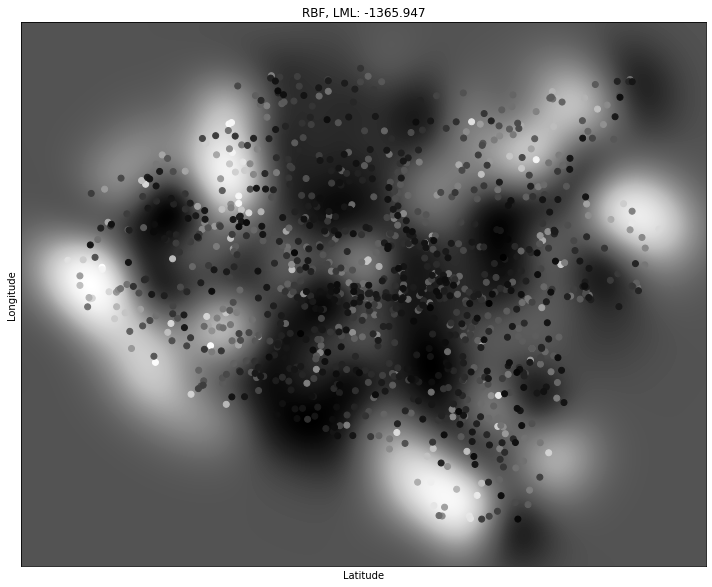

In [18]:
plt.figure(figsize=(10, 10))
    # Plot the predicted probabilities. For that, we will assign a color to
    # each point in the mesh [x_min, m_max]x[y_min, y_max].
plt.subplot(1, 1, 1)

plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), cmap = 'Greys', origin="lower")

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = [y], cmap = 'Greys')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("%s, LML: %.3f" %
          ("RBF", gp.log_marginal_likelihood(gp.kernel_.theta)))

plt.tight_layout()
plt.show()

### 4) What percentage of sensors have average traffic counts more than two standard deviations higher or lower than the model predicts given their spatial location? (5 pts)

In [19]:
#get our predicted values and standard deviations based on all data
y_pred, sigma = gp.predict(ldata1.iloc[:,:2], return_std = True)

In [20]:
#make our df's to add to our main df
d = pd.DataFrame(y_pred)
o = pd.DataFrame(sigma)

In [21]:
#merge preds and stds
df1 = d.merge(o, left_index = True, right_index = True, how = 'inner')

In [22]:
#merge main data to include preds and stds
traff1 = ldata1.merge(df1, left_index = True, right_index = True, how = 'inner')

In [23]:
traff1.head()

,Longitude,Latitude,AvgDailyTrafficCount,0_x,0_y
0,-80.278366,40.468606,4.430817,-1.594040,0.796953
1,-80.162117,40.384598,4.553877,-0.800837,0.785295
2,-80.221205,40.366778,4.574711,-1.246781,0.834106
3,-80.142455,40.622084,4.709530,-1.251590,0.802157
4,-80.131975,40.544915,4.828314,-1.326580,0.781547


In [24]:
traff1 = traff1.rename(columns = {'0_x':'pred', '0_y':'std'})

In [25]:
traff1.head()

,Longitude,Latitude,AvgDailyTrafficCount,pred,std
0,-80.278366,40.468606,4.430817,-1.594040,0.796953
1,-80.162117,40.384598,4.553877,-0.800837,0.785295
2,-80.221205,40.366778,4.574711,-1.246781,0.834106
3,-80.142455,40.622084,4.709530,-1.251590,0.802157
4,-80.131975,40.544915,4.828314,-1.326580,0.781547


In [26]:
#this is what we're actually predicting so this is how we measure how close we were
traff1['meandiff'] = traff1['AvgDailyTrafficCount']-traff1['AvgDailyTrafficCount'].mean()
traff1.head()

,Longitude,Latitude,AvgDailyTrafficCount,pred,std,meandiff
0,-80.278366,40.468606,4.430817,-1.594040,0.796953,-3.977526
1,-80.162117,40.384598,4.553877,-0.800837,0.785295,-3.854466
2,-80.221205,40.366778,4.574711,-1.246781,0.834106,-3.833632
3,-80.142455,40.622084,4.709530,-1.251590,0.802157,-3.698812
4,-80.131975,40.544915,4.828314,-1.326580,0.781547,-3.580029
5,-80.139674,40.623590,4.836282,-1.202210,0.802539,-3.572061
6,-79.813385,40.583852,4.897840,-1.006076,0.790533,-3.510503
7,-80.132048,40.537038,4.912655,-1.097593,0.778242,-3.495688
8,-80.278168,40.466386,4.912655,-1.659734,0.796259,-3.495688
9,-80.138849,40.591467,4.948760,-1.626498,0.783507,-3.459583


In [27]:
#outliers higher or lower than 2 stds away
out1 = traff1[(traff1['meandiff'] > (traff1['pred']+(2*traff1['std']))) | (traff1['meandiff'] < (traff1['pred']-(2*traff1['std'])))]

In [28]:
#just the higher outliers
outhigh = traff1[(traff1['meandiff'] > (traff1['pred']+(2*traff1['std'])))]

In [29]:
#just the lower outliers
outlow = traff1[(traff1['meandiff'] < (traff1['pred']-(2*traff1['std'])))]

In [30]:
#how many outliers do we have
out1.shape

(49, 6)

#### 49/1115 = ~4.39% are outliers

### 5) Show a 2-D scatter plot of the sensor locations, with three colors corresponding to observed values a) more than two standard deviations higher than predicted, b) more then two standard deviations lower than predicted, and c) within two standard deviations of the predicted values. (10 pts)

In [31]:
outhigh1 = outhigh.drop(['pred', 'std', 'meandiff'], axis = 1)
outhigh1.head()

,Longitude,Latitude,AvgDailyTrafficCount
582,-80.135749,40.609108,8.733272
714,-79.915201,40.259013,8.978030
934,-80.290929,40.492561,9.223059
947,-80.113020,40.553239,9.234447


In [32]:
outlow1 = outlow.drop(['pred', 'std', 'meandiff'], axis = 1)
outlow1.head()

,Longitude,Latitude,AvgDailyTrafficCount
0,-80.278366,40.468606,4.430817
1,-80.162117,40.384598,4.553877
2,-80.221205,40.366778,4.574711
3,-80.142455,40.622084,4.709530
4,-80.131975,40.544915,4.828314


In [33]:
#get all non outliers to plot
nonout = traff1[(traff1['meandiff'] < (traff1['pred']+(2*traff1['std']))) & (traff1['meandiff'] > (traff1['pred']-(2*traff1['std'])))]

In [34]:
nonout1 = nonout.drop(['pred', 'std', 'meandiff'], axis = 1)
nonout1.head()

,Longitude,Latitude,AvgDailyTrafficCount
10,-79.926118,40.238493,5.147494
13,-79.710853,40.515751,5.332719
14,-79.885113,40.202315,5.332719
15,-79.922908,40.213385,5.398163
17,-79.883802,40.199511,5.424950


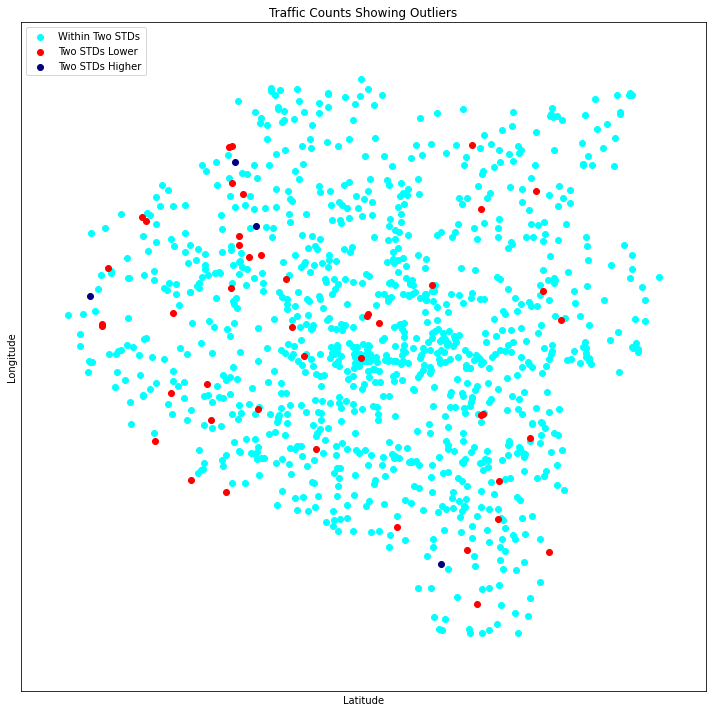

In [35]:
plt.figure(figsize=(10, 10))
    
plt.subplot(1, 1, 1)


# Plot points for nonoutliers, high outliers and low outliers
a1 = plt.scatter(nonout1.iloc[:, 0], nonout1.iloc[:, 1], c = 'cyan')
a2 = plt.scatter(outlow1.iloc[:, 0], outlow1.iloc[:, 1], c = 'Red')
a3 = plt.scatter(outhigh1.iloc[:, 0], outhigh1.iloc[:, 1], c = 'Navy')


plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("Traffic Counts Showing Outliers") 
plt.legend([a1, a2, a3],
           ["Within Two STDs",
            "Two STDs Lower", "Two STDs Higher"],
           loc="upper left")
plt.tight_layout()
plt.show()

### Question 2: Cluster-based anomaly detection (10 points)

Given an unlabeled dataset with two real-valued attributes, we perform cluster-based anomaly detection by running k-means, choosing the number of clusters k automatically using the Schwarz criterion.  Four clusters are formed:

A: 100 points, center (0, 0), standard deviation 0.1

B: 150 points, center (35, 5), standard deviation 5

C: 2 points, center (15, 20), standard deviation 1

D: 200 points, center (10, 10), standard deviation 1

Given the four points below, which of these points are, and are not, likely to be anomalies?  Choose “Anomaly” or “Not Anomaly”, and provide a brief explanation, for each point. 
(Hint: your answers should take into account the size and standard deviation of each cluster as well as the distances to cluster centers.)

(1, 0)		Anomaly / Not Anomaly


(35, 2)		Anomaly / Not Anomaly


(15, 19)	Anomaly / Not Anomaly


(10, 11)	Anomaly / Not Anomaly


(1,0) Anomaly. This is close in distance to the center of cluster A, however this cluster is very dense, and this point is actually 10 standard deviations away from the center therefore it is anomalous.

(35,2) Not Anomaly. This cluster is close to the cluster center B and within 1 standard deviation of a large cluster, therefore it is not anomalous.

(15,19) Anomaly, it is close to the center of cluster C and within 1 standard deviation, however this cluster has 2 points and with 4 total clusters, a 2 point cluster is anomalous.

(10,11) Not Anomaly. This cluster is 1 standard deviation away from the center of the biggest cluster D, well within the confines of the data.

### Question 3: Anomaly detection (50 points)

For this question, use the "County Health Indicators" dataset provided to identify the most anomalous counties. Please list the top 5 most anomalous counties computed using each of the following models.  (We recommend that, as a pre-processing step, you drop na values, and make sure all numeric values are treated as floats not strings.)

Part 1: Learn a Bayesian network structure using only the six features ["'\% Smokers'","'\% Obese'","'Violent Crime Rate'","'80/20 Income Ratio'","'\% Children in Poverty'","'Average Daily PM2.5'"].  Use pd.cut() to discretize each feature into 5 categories: 0,1,2,3,4. 

(a) Use HillClimbSearch and BicScore to learn the Bayesian network structure (5 pts) 

(b) Which 5 counties have the lowest (most negative) log-likelihood values? Please show a ranked list of the top counties' names and log-likelihood values. (10 pts)

Part 2: Cluster based anomaly detection.  Use all numeric features for this part, and do not discretize. 

(a) Clustering with k-means. Please use k=3 clusters. Compute each record's distance to the nearest cluster center and report the five counties which have the longest distances. (10 pts)

(b) Cluster with Gaussian Mixture. Please repeat (2)a but use log-likelihood for each record (rather than distance) as the measure of anomalousness. (10 pts)

Part 3: Choose one more anomaly detection model you prefer and report the top 5 most anomalous counties by the model you chose.  (10 pts)

Part 4: Compare and contrast the results from the different models.  Were there some counties that were found to be anomalous in some models and not in others?  Please provide some intuitions on why each county was found to be anomalous. (5 pts)

In [36]:
import numpy as np
import pandas as pd

#read in the data

Data2=pd.read_csv("2016CountyHealthIndicators.csv")
Data2.head()

#nan's are ? in our case, harder to drop so we replace
Data2 = Data2.replace({'?': np.nan})

#column names are messy, let us clean
Data2.columns = Data2.columns.str.strip().str.lower().str.replace(' ', '_').str.replace("'\'", '').str.replace("'", '')

#drop na's, reset index, get rid of column that gets created
Data2 = Data2.dropna()
Data2 = Data2.reset_index()
Data2 = Data2.drop(['index'], axis = 1)

#turn all numberic columns after 'county' to floats for our analysis
Data2.iloc[:,1:]=Data2.iloc[:,1:].astype(float)

### Part 1: Learn a Bayesian network structure using only the six features ["'\% Smokers'","'\% Obese'","'Violent Crime Rate'","'80/20 Income Ratio'","'\% Children in Poverty'","'Average Daily PM2.5'"].  Use pd.cut() to discretize each feature into 5 categories: 0,1,2,3,4. 

### (a) Use HillClimbSearch and BicScore to learn the Bayesian network structure (5 pts) 

### (b) Which 5 counties have the lowest (most negative) log-likelihood values? Please show a ranked list of the top counties' names and log-likelihood values. (10 pts)

In [ ]:
#make a quick copy of the data
Data2_ = Data2

In [ ]:
#turn data we want into a ranking from 1-5
for i in Data2_.loc[:,['\%_smokers', '\%_obese','violent_crime_rate','80/20_income_ratio','\%_children_in_poverty','average_daily_pm2.5']]:
  Data2[i] = pd.qcut(Data2_[i],q=5,labels=False)
print (Data2_.head())

In [ ]:
#just the data we want
Data2bayes = Data2_.loc[:,['county','\%_smokers', '\%_obese','violent_crime_rate','80/20_income_ratio','\%_children_in_poverty','average_daily_pm2.5']]
Data2bayes.head()

In [ ]:
#leanr the structure of the model
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BicScore
hc = HillClimbSearch(Data2bayes.iloc[:,1:], scoring_method=BicScore(Data2bayes.iloc[:,1:]))
best_model = hc.estimate()
print(best_model.edges())

In [ ]:
#get the CPDs
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator

model = BayesianModel(best_model.edges())
model.fit(Data2bayes.iloc[:,1:], estimator=MaximumLikelihoodEstimator)
for cpd in model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)

In [ ]:
# Log-likelihood of data record x given model
def LL(x,model,verbose=False):
    loglike = 0
    for cpd in model.get_cpds():
        temp_cpd = cpd.copy()
        thevariable = temp_cpd.variable
        theparents = model.predecessors(thevariable)
        for parent in theparents:
            temp_cpd.reduce([(parent, x[parent])])
        theprob = temp_cpd.get_values()[x[thevariable],0]
        if verbose:
            print(thevariable,theparents,theprob)
        loglike += np.log(theprob)
    return loglike

In [ ]:
Data2bayes = Data2bayes.reset_index()

In [ ]:
exmp=Data2bayes.iloc[:,:].apply(lambda x: LL(x,model),axis=1)

In [ ]:
#find our counties
print(exmp.sort_values().head())

In [ ]:
#to see what counties this corresponds too
Data2bayes.iloc[[2251, 2296, 72, 275, 923],:]

In [ ]:
# look at the most anomalous record
print (Data2bayes.iloc[2251,:])
print()
LL(Data2bayes.iloc[2251,:],model,verbose=True)

Part 2: Cluster based anomaly detection. Use all numeric features for this part, and do not discretize.
(a) Clustering with k-means. Please use k=3 clusters. Compute each record's distance to the nearest cluster center and report the five counties which have the longest distances. (10 pts)
(b) Cluster with Gaussian Mixture. Please repeat (2)a but use log-likelihood for each record (rather than distance) as the measure of anomalousness. (10 pts)

In [37]:
#KMeans clustering
from sklearn.cluster import KMeans
KM=KMeans(n_clusters=3,random_state=999)
scor=KM.fit_predict(Data2.iloc[:,1:])

# distance to each cluster center
res=pd.DataFrame(KM.transform(Data2.iloc[:,1:]))
res.head()

,0,1,2
0,215.615116,101.858829,554.609617
1,108.458962,186.169514,655.932344
2,410.500967,282.492097,530.643663
3,168.288199,141.329362,602.378878
4,105.182706,314.775404,777.335076


In [38]:
# add cluster and distance information for each data record
res=pd.DataFrame(KM.transform(Data2.iloc[:,1:]))
res=pd.concat((res,pd.DataFrame(KM.fit_predict(Data2.iloc[:,1:]))),axis=1)
res.columns=list(range(3))+["cluster"]
res.loc[:,"score"]=res.apply(lambda x: x[int(x["cluster"])],axis=1)

# find data records farthest from cluster centers
res.sort_values("score",ascending=False)[:10]

,0,1,2,cluster,score
1890,2443.706603,2251.524302,1970.018443,2,1970.018443
1294,2036.276814,1759.353603,1332.735955,2,1332.735955
96,1917.861038,1639.172544,1208.900834,2,1208.900834
2304,1644.913092,1394.891428,1017.910163,2,1017.910163
995,1652.073316,1366.871758,918.374430,2,918.374430
64,1221.797912,1014.362306,773.253831,2,773.253831
1577,993.516571,835.319606,742.821948,2,742.821948
1806,1468.590621,1179.143587,713.530727,2,713.530727
1850,1324.122437,1062.130113,705.064561,2,705.064561
911,1296.689904,1036.709816,688.028173,2,688.028173


In [39]:
#create a new df with the top 5 anomalies for use later when comparing
KMDF = Data2.iloc[[1890,1294,96,2304,995],:]
KMDF.head()

,county,\%_reporting_fair/poor_health,physically_unhealthy_days_per_month,mentally_unhealthy_days_per_month,\%_low_birth_weight_births,\%_smokers,\%_obese,food_environment_index,\%_physically_inactive,\%_with_access_to_exercise,...,\%_children_in_poverty,80/20_income_ratio,\%_single-parent_households,association_rate,violent_crime_rate,injury_death_rate,average_daily_pm2.5,\%_severe_housing_problems,\%_drive_alone,\%_long_commute_-_drives_alone
1890,"Shannon, South Dakota",33.0,5.9,4.7,7.0,41.0,45.0,1.6,24.0,2.0,...,54.0,6.5,68.0,2.8,0.0,200.0,11.8,44.0,64.0,22.0
1294,"St. Louis City, Missouri",23.0,5.0,4.4,12.0,26.0,32.0,5.0,25.0,99.0,...,43.0,6.2,61.0,14.1,1885.0,98.0,11.9,23.0,71.0,25.0
96,"Crittenden, Arkansas",26.0,5.2,4.6,13.0,26.0,38.0,4.8,34.0,63.0,...,41.0,5.1,58.0,8.2,1764.0,65.0,12.7,20.0,83.0,31.0
2304,"Petersburg City, Virginia",26.0,4.5,4.0,13.0,23.0,38.0,4.4,28.0,93.0,...,38.0,4.9,68.0,16.6,560.0,81.0,12.3,18.0,79.0,23.0
995,"Baltimore City, Maryland",20.0,3.8,3.9,12.0,21.0,34.0,6.0,29.0,99.0,...,32.0,6.2,66.0,9.7,1449.0,99.0,12.6,24.0,60.0,39.0


In [ ]:
#for personal reference and check

#from sklearn.cluster import KMeans
#KM=KMeans(n_clusters=3,random_state=999)
#scor=KM.fit_predict(Data2.iloc[:,1:])

# distance to each cluster center
#res=pd.DataFrame(KM.transform(Data2.iloc[:,1:]))
#res.head()

# add cluster and distance information for each data record
#res=pd.DataFrame(KM.transform(Data2.iloc[:,1:]))
#res=pd.concat((res,pd.DataFrame(KM.fit_predict(Data2.iloc[:,1:]))),axis=1)
#res.columns=list(range(3))+["cluster"]
#res.loc[:,"score"]=res.apply(lambda x: x[int(x["cluster"])],axis=1)

# find data records farthest from cluster centers
#print(res.sort_values("score",ascending=False)[:5])

# check for tiny clusters
#print (res['cluster'].value_counts())

In [40]:
#Do a GM Model
from sklearn.mixture import GaussianMixture
GM=GaussianMixture(n_components=3,random_state=999)
GM.fit(Data2.iloc[:,1:])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=999, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

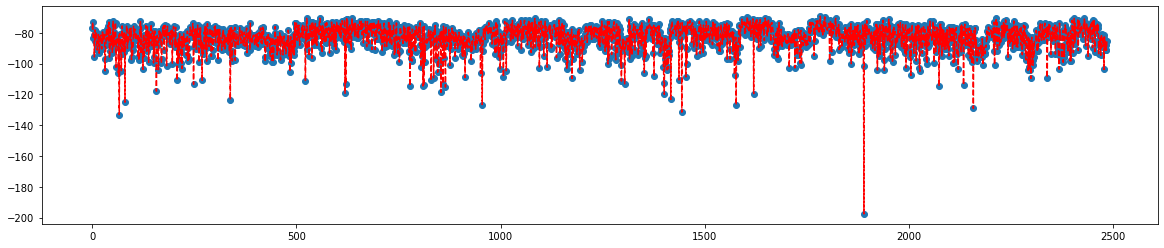

In [41]:
# score_samples function gives the log of the probability density of each data record given its cluster.
# Note that probability densities can exceed 1 (unlike probabilities of discrete data).
plt.figure(figsize=(20,4))
plt.scatter(range(len(Data2.iloc[:,1:])),GM.score_samples(Data2.iloc[:,1:]))
plt.plot(GM.score_samples(Data2.iloc[:,1:]),"r--")
plt.show()

In [42]:
# 5 most anomalous data points by log-likelihood (i.e. log probability density)
pd.DataFrame(GM.score_samples(Data2.iloc[:,1:])).sort_values(0)[:5]

,0
1890,-197.640278
66,-133.169600
1444,-131.535889
2158,-129.175629
1577,-126.773258


In [43]:
#check the counties for these 5 and save to a df for comparison later
GPDF = Data2.iloc[[1890,66,1444,2158,1577],:]
GPDF.head()

,county,\%_reporting_fair/poor_health,physically_unhealthy_days_per_month,mentally_unhealthy_days_per_month,\%_low_birth_weight_births,\%_smokers,\%_obese,food_environment_index,\%_physically_inactive,\%_with_access_to_exercise,...,\%_children_in_poverty,80/20_income_ratio,\%_single-parent_households,association_rate,violent_crime_rate,injury_death_rate,average_daily_pm2.5,\%_severe_housing_problems,\%_drive_alone,\%_long_commute_-_drives_alone
1890,"Shannon, South Dakota",33.0,5.9,4.7,7.0,41.0,45.0,1.6,24.0,2.0,...,54.0,6.5,68.0,2.8,0.0,200.0,11.8,44.0,64.0,22.0
66,"Apache, Arizona",30.0,5.7,5.3,7.0,26.0,33.0,0.5,22.0,22.0,...,40.0,6.3,52.0,3.5,94.0,173.0,9.8,36.0,75.0,42.0
1444,"New York, New York",14.0,3.5,3.5,9.0,13.0,15.0,7.8,18.0,98.0,...,24.0,8.7,41.0,13.0,620.0,32.0,10.8,25.0,6.0,63.0
2158,"Willacy, Texas",37.0,5.2,3.6,9.0,20.0,29.0,7.3,27.0,0.0,...,46.0,6.8,43.0,5.9,902.0,47.0,8.7,18.0,90.0,27.0
1577,"Roulette, North Dakota",29.0,5.1,4.5,10.0,38.0,41.0,6.9,34.0,21.0,...,41.0,7.7,59.0,6.2,29.0,104.0,9.6,21.0,84.0,14.0


### Part 3: Choose one more anomaly detection model you prefer and report the top 5 most anomalous counties by the model you chose.  (10 pts)

In [44]:
from sklearn.ensemble import IsolationForest

# fit the model
clf = IsolationForest(max_samples=1000, random_state=999)
clf.fit(Data2.iloc[:,1:])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=1000, n_estimators=100,
                n_jobs=None, random_state=999, verbose=0, warm_start=False)

In [45]:
#anomaly scores based on IF Model
Data2['scores']=clf.decision_function(Data2.iloc[:,1:31])
Data2.head()

,county,\%_reporting_fair/poor_health,physically_unhealthy_days_per_month,mentally_unhealthy_days_per_month,\%_low_birth_weight_births,\%_smokers,\%_obese,food_environment_index,\%_physically_inactive,\%_with_access_to_exercise,...,80/20_income_ratio,\%_single-parent_households,association_rate,violent_crime_rate,injury_death_rate,average_daily_pm2.5,\%_severe_housing_problems,\%_drive_alone,\%_long_commute_-_drives_alone,scores
0,"Autauga, Alabama",19.0,4.4,4.3,9.0,19.0,31.0,7.1,29.0,71.0,...,4.3,27.0,13.8,254.0,76.0,12.9,14.0,89.0,42.0,0.126115
1,"Baldwin, Alabama",16.0,4.1,4.2,9.0,19.0,27.0,7.6,25.0,72.0,...,4.5,28.0,12.0,221.0,70.0,13.1,15.0,84.0,37.0,0.132573
2,"Barbour, Alabama",26.0,4.9,4.7,12.0,21.0,41.0,5.1,33.0,45.0,...,5.3,54.0,8.1,147.0,64.0,12.6,18.0,84.0,35.0,0.072804
3,"Bibb, Alabama",22.0,4.8,4.6,12.0,21.0,40.0,7.4,33.0,33.0,...,4.3,32.0,9.8,236.0,75.0,12.9,13.0,84.0,46.0,0.103388
4,"Blount, Alabama",21.0,4.6,4.5,7.0,19.0,32.0,8.3,29.0,26.0,...,4.1,28.0,8.5,219.0,89.0,12.7,12.0,85.0,59.0,0.091343


In [46]:
#anomaly predictions
Data2['anomaly']=clf.predict(Data2.iloc[:,1:31])
Data2.head()

,county,\%_reporting_fair/poor_health,physically_unhealthy_days_per_month,mentally_unhealthy_days_per_month,\%_low_birth_weight_births,\%_smokers,\%_obese,food_environment_index,\%_physically_inactive,\%_with_access_to_exercise,...,\%_single-parent_households,association_rate,violent_crime_rate,injury_death_rate,average_daily_pm2.5,\%_severe_housing_problems,\%_drive_alone,\%_long_commute_-_drives_alone,scores,anomaly
0,"Autauga, Alabama",19.0,4.4,4.3,9.0,19.0,31.0,7.1,29.0,71.0,...,27.0,13.8,254.0,76.0,12.9,14.0,89.0,42.0,0.126115,1
1,"Baldwin, Alabama",16.0,4.1,4.2,9.0,19.0,27.0,7.6,25.0,72.0,...,28.0,12.0,221.0,70.0,13.1,15.0,84.0,37.0,0.132573,1
2,"Barbour, Alabama",26.0,4.9,4.7,12.0,21.0,41.0,5.1,33.0,45.0,...,54.0,8.1,147.0,64.0,12.6,18.0,84.0,35.0,0.072804,1
3,"Bibb, Alabama",22.0,4.8,4.6,12.0,21.0,40.0,7.4,33.0,33.0,...,32.0,9.8,236.0,75.0,12.9,13.0,84.0,46.0,0.103388,1
4,"Blount, Alabama",21.0,4.6,4.5,7.0,19.0,32.0,8.3,29.0,26.0,...,28.0,8.5,219.0,89.0,12.7,12.0,85.0,59.0,0.091343,1
5,"Bullock, Alabama",29.0,5.3,4.8,14.0,22.0,45.0,3.9,33.0,23.0,...,73.0,10.3,283.0,90.0,12.8,15.0,78.0,47.0,-0.009318,-1
6,"Butler, Alabama",27.0,5.3,5.1,11.0,23.0,36.0,6.0,34.0,46.0,...,52.0,11.3,483.0,80.0,12.8,19.0,86.0,35.0,0.058448,1
7,"Calhoun, Alabama",22.0,4.9,4.9,9.0,24.0,32.0,6.2,34.0,59.0,...,40.0,14.2,505.0,73.0,12.9,15.0,85.0,29.0,0.099486,1
8,"Chambers, Alabama",26.0,5.1,4.9,12.0,21.0,40.0,5.7,35.0,61.0,...,54.0,18.1,553.0,77.0,13.0,17.0,86.0,36.0,0.074122,1
9,"Cherokee, Alabama",20.0,4.6,4.7,9.0,20.0,33.0,7.8,31.0,33.0,...,31.0,9.5,374.0,91.0,12.9,13.0,86.0,44.0,0.111225,1


In [47]:
#save to new df for later comparison, sort by scores to see most anomalous
Data2IF = Data2.sort_values(by = ['scores'])
Data2IF.head()

,county,\%_reporting_fair/poor_health,physically_unhealthy_days_per_month,mentally_unhealthy_days_per_month,\%_low_birth_weight_births,\%_smokers,\%_obese,food_environment_index,\%_physically_inactive,\%_with_access_to_exercise,...,\%_single-parent_households,association_rate,violent_crime_rate,injury_death_rate,average_daily_pm2.5,\%_severe_housing_problems,\%_drive_alone,\%_long_commute_-_drives_alone,scores,anomaly
1890,"Shannon, South Dakota",33.0,5.9,4.7,7.0,41.0,45.0,1.6,24.0,2.0,...,68.0,2.8,0.0,200.0,11.8,44.0,64.0,22.0,-0.242392,-1
66,"Apache, Arizona",30.0,5.7,5.3,7.0,26.0,33.0,0.5,22.0,22.0,...,52.0,3.5,94.0,173.0,9.8,36.0,75.0,42.0,-0.152307,-1
1577,"Roulette, North Dakota",29.0,5.1,4.5,10.0,38.0,41.0,6.9,34.0,21.0,...,59.0,6.2,29.0,104.0,9.6,21.0,84.0,14.0,-0.124357,-1
1164,"Coahoma, Mississippi",28.0,4.8,4.5,19.0,25.0,46.0,2.5,38.0,72.0,...,70.0,9.5,717.0,114.0,12.2,20.0,77.0,18.0,-0.093557,-1
1401,"McKinley, New Mexico",25.0,5.3,5.0,8.0,21.0,33.0,2.4,23.0,43.0,...,48.0,5.5,635.0,135.0,9.8,28.0,73.0,31.0,-0.089998,-1


### Part 4: Compare and contrast the results from the different models.  Were there some counties that were found to be anomalous in some models and not in others?  Please provide some intuitions on why each county was found to be anomalous. (5 pts)

In [48]:
pd.set_option('display.max_columns', 500)
#see all the columns and print below to compare

In [49]:
KMDF.head()

,county,\%_reporting_fair/poor_health,physically_unhealthy_days_per_month,mentally_unhealthy_days_per_month,\%_low_birth_weight_births,\%_smokers,\%_obese,food_environment_index,\%_physically_inactive,\%_with_access_to_exercise,\%_excessive_drinking,\%_alcohol-impaired_driving_deaths,chlamydia_rate,teen_birth_rate,\%_uninsured,preventable_hosp._rate,\%_dibetics_receiving_hba1c,\%_mammography,graduation_rate,\%_some_college,\%_unemployed,\%_children_in_poverty,80/20_income_ratio,\%_single-parent_households,association_rate,violent_crime_rate,injury_death_rate,average_daily_pm2.5,\%_severe_housing_problems,\%_drive_alone,\%_long_commute_-_drives_alone
1890,"Shannon, South Dakota",33.0,5.9,4.7,7.0,41.0,45.0,1.6,24.0,2.0,16.0,68.0,2653.0,110.0,17.0,161.0,19.0,26.0,3.0,51.8,13.2,54.0,6.5,68.0,2.8,0.0,200.0,11.8,44.0,64.0,22.0
1294,"St. Louis City, Missouri",23.0,5.0,4.4,12.0,26.0,32.0,5.0,25.0,99.0,17.0,33.0,1297.0,61.0,18.0,57.0,85.0,57.0,67.0,68.6,7.7,43.0,6.2,61.0,14.1,1885.0,98.0,11.9,23.0,71.0,25.0
96,"Crittenden, Arkansas",26.0,5.2,4.6,13.0,26.0,38.0,4.8,34.0,63.0,13.0,39.0,1267.0,83.0,16.0,59.0,85.0,59.0,75.0,48.5,7.3,41.0,5.1,58.0,8.2,1764.0,65.0,12.7,20.0,83.0,31.0
2304,"Petersburg City, Virginia",26.0,4.5,4.0,13.0,23.0,38.0,4.4,28.0,93.0,12.0,45.0,1817.0,98.0,17.0,81.0,82.0,63.0,68.0,43.0,10.6,38.0,4.9,68.0,16.6,560.0,81.0,12.3,18.0,79.0,23.0
995,"Baltimore City, Maryland",20.0,3.8,3.9,12.0,21.0,34.0,6.0,29.0,99.0,17.0,26.0,1250.0,57.0,13.0,62.0,81.0,62.0,69.0,59.9,8.7,32.0,6.2,66.0,9.7,1449.0,99.0,12.6,24.0,60.0,39.0


In [50]:
GPDF.head()

,county,\%_reporting_fair/poor_health,physically_unhealthy_days_per_month,mentally_unhealthy_days_per_month,\%_low_birth_weight_births,\%_smokers,\%_obese,food_environment_index,\%_physically_inactive,\%_with_access_to_exercise,\%_excessive_drinking,\%_alcohol-impaired_driving_deaths,chlamydia_rate,teen_birth_rate,\%_uninsured,preventable_hosp._rate,\%_dibetics_receiving_hba1c,\%_mammography,graduation_rate,\%_some_college,\%_unemployed,\%_children_in_poverty,80/20_income_ratio,\%_single-parent_households,association_rate,violent_crime_rate,injury_death_rate,average_daily_pm2.5,\%_severe_housing_problems,\%_drive_alone,\%_long_commute_-_drives_alone
1890,"Shannon, South Dakota",33.0,5.9,4.7,7.0,41.0,45.0,1.6,24.0,2.0,16.0,68.0,2653.0,110.0,17.0,161.0,19.0,26.0,3.0,51.8,13.2,54.0,6.5,68.0,2.8,0.0,200.0,11.8,44.0,64.0,22.0
66,"Apache, Arizona",30.0,5.7,5.3,7.0,26.0,33.0,0.5,22.0,22.0,15.0,20.0,822.0,55.0,24.0,89.0,28.0,39.0,66.0,47.5,16.0,40.0,6.3,52.0,3.5,94.0,173.0,9.8,36.0,75.0,42.0
1444,"New York, New York",14.0,3.5,3.5,9.0,13.0,15.0,7.8,18.0,98.0,21.0,10.0,706.0,21.0,11.0,42.0,81.0,61.0,66.0,83.0,6.1,24.0,8.7,41.0,13.0,620.0,32.0,10.8,25.0,6.0,63.0
2158,"Willacy, Texas",37.0,5.2,3.6,9.0,20.0,29.0,7.3,27.0,0.0,15.0,32.0,426.0,72.0,30.0,68.0,90.0,45.0,88.0,34.1,12.3,46.0,6.8,43.0,5.9,902.0,47.0,8.7,18.0,90.0,27.0
1577,"Roulette, North Dakota",29.0,5.1,4.5,10.0,38.0,41.0,6.9,34.0,21.0,20.0,59.0,1203.0,96.0,21.0,117.0,40.0,45.0,68.0,62.4,11.8,41.0,7.7,59.0,6.2,29.0,104.0,9.6,21.0,84.0,14.0


In [51]:
Data2IF.head()

,county,\%_reporting_fair/poor_health,physically_unhealthy_days_per_month,mentally_unhealthy_days_per_month,\%_low_birth_weight_births,\%_smokers,\%_obese,food_environment_index,\%_physically_inactive,\%_with_access_to_exercise,\%_excessive_drinking,\%_alcohol-impaired_driving_deaths,chlamydia_rate,teen_birth_rate,\%_uninsured,preventable_hosp._rate,\%_dibetics_receiving_hba1c,\%_mammography,graduation_rate,\%_some_college,\%_unemployed,\%_children_in_poverty,80/20_income_ratio,\%_single-parent_households,association_rate,violent_crime_rate,injury_death_rate,average_daily_pm2.5,\%_severe_housing_problems,\%_drive_alone,\%_long_commute_-_drives_alone,scores,anomaly
1890,"Shannon, South Dakota",33.0,5.9,4.7,7.0,41.0,45.0,1.6,24.0,2.0,16.0,68.0,2653.0,110.0,17.0,161.0,19.0,26.0,3.0,51.8,13.2,54.0,6.5,68.0,2.8,0.0,200.0,11.8,44.0,64.0,22.0,-0.242392,-1
66,"Apache, Arizona",30.0,5.7,5.3,7.0,26.0,33.0,0.5,22.0,22.0,15.0,20.0,822.0,55.0,24.0,89.0,28.0,39.0,66.0,47.5,16.0,40.0,6.3,52.0,3.5,94.0,173.0,9.8,36.0,75.0,42.0,-0.152307,-1
1577,"Roulette, North Dakota",29.0,5.1,4.5,10.0,38.0,41.0,6.9,34.0,21.0,20.0,59.0,1203.0,96.0,21.0,117.0,40.0,45.0,68.0,62.4,11.8,41.0,7.7,59.0,6.2,29.0,104.0,9.6,21.0,84.0,14.0,-0.124357,-1
1164,"Coahoma, Mississippi",28.0,4.8,4.5,19.0,25.0,46.0,2.5,38.0,72.0,11.0,6.0,1377.0,92.0,19.0,77.0,78.0,50.0,55.0,58.6,12.4,48.0,6.4,70.0,9.5,717.0,114.0,12.2,20.0,77.0,18.0,-0.093557,-1
1401,"McKinley, New Mexico",25.0,5.3,5.0,8.0,21.0,33.0,2.4,23.0,43.0,14.0,42.0,1101.0,63.0,30.0,92.0,23.0,46.0,71.0,45.3,9.8,43.0,7.1,48.0,5.5,635.0,135.0,9.8,28.0,73.0,31.0,-0.089998,-1


#### We can see that Shannon, SD is at the top of all of our lists.
#### Apache, AZ, and Roulette, ND both makes the Gaussian Mixture and Isolation Forest list.

#### All other counties were not found on each others list (just when looking at the top 5, could still be anomalous classifications

In [52]:
Data2.describe()
#descriptive statistics to see why we are anomalous

,\%_reporting_fair/poor_health,physically_unhealthy_days_per_month,mentally_unhealthy_days_per_month,\%_low_birth_weight_births,\%_smokers,\%_obese,food_environment_index,\%_physically_inactive,\%_with_access_to_exercise,\%_excessive_drinking,\%_alcohol-impaired_driving_deaths,chlamydia_rate,teen_birth_rate,\%_uninsured,preventable_hosp._rate,\%_dibetics_receiving_hba1c,\%_mammography,graduation_rate,\%_some_college,\%_unemployed,\%_children_in_poverty,80/20_income_ratio,\%_single-parent_households,association_rate,violent_crime_rate,injury_death_rate,average_daily_pm2.5,\%_severe_housing_problems,\%_drive_alone,\%_long_commute_-_drives_alone,scores,anomaly
count,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000
mean,17.203942,3.865809,3.753097,8.222446,18.569992,31.022928,7.093242,27.162108,63.002011,16.604988,30.886163,353.059533,41.796862,16.988335,62.772727,84.739743,60.789220,84.398230,56.113033,6.451247,23.844730,4.545133,33.345937,12.731175,267.538616,74.454545,11.720072,14.958568,80.197908,30.881738,0.087378,0.937249
std,4.856641,0.715394,0.581101,1.971016,3.646631,4.524278,1.069392,5.554257,22.020285,3.420385,12.739343,217.303794,18.499012,5.185286,24.107878,5.918107,7.798972,8.568666,11.311936,2.067366,8.692791,0.695486,9.383930,4.981697,198.532609,21.554035,1.535203,4.277249,5.945515,11.935865,0.038113,0.348732
min,7.000000,2.200000,2.100000,3.000000,7.000000,11.000000,0.500000,9.000000,0.000000,9.000000,0.000000,35.000000,4.000000,3.000000,12.000000,19.000000,26.000000,3.000000,20.200000,1.200000,3.000000,2.700000,1.000000,1.000000,0.000000,25.000000,7.200000,5.000000,6.000000,3.000000,-0.242392,-1.000000
25%,13.000000,3.400000,3.300000,7.000000,16.000000,29.000000,6.500000,24.000000,48.000000,14.000000,23.000000,208.000000,28.000000,13.000000,48.000000,83.000000,56.000000,80.000000,48.100000,5.100000,17.250000,4.100000,27.000000,9.300000,128.000000,60.000000,10.600000,12.000000,78.000000,22.000000,0.069366,1.000000
50%,16.000000,3.800000,3.800000,8.000000,18.000000,31.000000,7.200000,27.000000,65.000000,17.000000,30.000000,296.500000,40.000000,17.000000,59.000000,86.000000,61.000000,86.000000,56.000000,6.200000,23.000000,4.400000,33.000000,12.100000,216.000000,72.000000,12.000000,14.000000,81.000000,30.000000,0.095008,1.000000
75%,20.000000,4.400000,4.100000,9.000000,21.000000,34.000000,7.800000,31.000000,80.000000,19.000000,38.000000,439.000000,53.000000,20.000000,73.000000,88.000000,66.000000,91.000000,64.000000,7.600000,29.000000,4.900000,38.000000,15.500000,356.750000,87.000000,13.000000,17.000000,84.000000,39.000000,0.114647,1.000000
max,42.000000,6.500000,5.600000,19.000000,41.000000,46.000000,10.000000,42.000000,100.000000,27.000000,100.000000,2653.000000,124.000000,38.000000,231.000000,96.000000,84.000000,100.000000,88.300000,23.600000,54.000000,8.700000,76.000000,41.000000,1885.000000,200.000000,14.900000,44.000000,95.000000,72.000000,0.147916,1.000000


What makes Shannon, SD anomalous - they are very unhealthy physically, have very high numbers of smokers and obesity compared to the data mean, a low food environment index, and a VERY low % with access to exercise, almost criminally low. High number of alcohol impared driving deaths and astronomical chlamydia rates. They also have poor education numbers. Additionally they have 0 violent crime, could be misreported, but all of this in combination makes them an anomaly.

Apache, Az has a very low Food Environment index, high unemployement numbers, a very high injury death rate, and many houses with sever housing problems

Roulette, ND has high smokers and obesity, low % with access to exercise, good education numbers, but many children in poverty and a high income split

The other counties listed mainly have several scores that would be considered outliers on their own in one direction or the other, when we look at these scores in combination, for example the very high Graduation rate in conjunction with a very high crime for East Carroll, LA, we see our anomalous values.